In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Introdución a la Probabilidad

<cite> El conocimiento estadistico y probabilístico aplicado es el núcleo del conocimiento; la estadística es lo que te dice si algo es verdadero,falso o anecdotico; es la "lógica de la ciencia"; es el instrumento de la asunción de riesgos.... no se puede ser un profesional moderno y no pensar probabilísticamente (Nassim Nicolás Taleb) <cite> 

<p> Esta serie de notebooks son  un complemento para el curso de probabilidades y estádistica para ingeniería que estoy impartiendo actualmente, revisaré algunos aspectos fundamentales de la teoría de la probabilidad básica, será un material bastante básico pero con la intención de esclarecer la idea de probabilidad en los estudiantes que se introducen en la materia.</p>

<img src="../assets/image/intro.jpg" width="800" height="200"/>

### ¿Qué es la probabilidad?

Para definir la probabilidad nos quedaremos con la definición clasica que plantea Laplace, donde en plantea que la probabilidad se comparte por igual entre odos los resultados posibles, siempre que los resultados se consideren igualmente probabables.

<cite> La teoría de la probabilidad consiste en reducir todos los eventos de un mismo tipo de casos igualmente probables y determinar el número de casos favorables al evento de la probabilidad que se busca (Pierre-Simon Laplace)<cite>

###### Si bien esta definición ofrece limitaciones, como que solo hay un número finitos de resultados posibles y plantear que los resultados son igualmente probables, pero por ahora nos resulta útil para comprender la idea

<p> Entonces para conocer la probabilidad de un evento <i>A</i> </p> 

$$ P(A) = \frac{N_i}{N}

Una pregunta clásica es acerca del lanzamiento de monedas, ¿Cuál es la probabilidad de que salga cara en la moneda simetrica? 
###### simetrica quiere decir que la moneda no esta doblada o pesa más de un lado. 

Por la formula presentada el resultado sería:
$$ P(A) = \frac{N_i} {N} = \frac{1}{2} $$




Es decir, un elemento de todas las posibilidades en este caso cara sobre todos los posibles resultados cara o sello, es decir 2.

Esta relación se mantiene, si lanzamos varias veces la moneda quiere decir que obtendremos la mitad de las veces cara y la otra mitad sello?

Hagamos una simulación

Sabiendo que la probabilidad de cada elemento es 1/2 que sea cara o que se sello. 
Denotaremos los elementos como <cite>T y H ; T= Tail y H=head <cite>, esta notación es para seguir la nomeclatura en caso de que utilizar libros en inglés

In [47]:
lanzamientos  = 10
opciones = ['H','T']
prob = [0.5 , 0.5]

In [48]:
simulacion = np.random.choice(['H','T'],size=lanzamientos, p=prob)
simulacion

array(['T', 'H', 'H', 'T', 'H', 'H', 'T', 'H', 'H', 'H'], dtype='<U1')

In [49]:
valores, cant = np.unique(simulacion, return_counts=True)
print("Para {lan} la probabilidad de obtener cara fue {p}".format(lan=lanzamientos,p=cant[0]/len(simulacion)))

Para 10 la probabilidad de obtener cara fue 0.7


Otra formula que debemos tener encuenta es el error estandar, tengamos esta formula en cuenta en todo momento.

$$ SE = \frac{\sigma}{\sqrt{N}}

Si nuestra desviación estandar es 1/2 y la cantidad de lanzamientos es 10, nuestro error es:
$$ SE =  \frac{0.5}{10}

Crearemos un código para realizar la misma prueba varias veces

In [50]:
0.5/np.sqrt(10)

0.15811388300841897

In [51]:
def testI(lanzamientos:int,result:bool):
    a  = lanzamientos
    opciones = ['H','T']
    prob = [0.5 , 0.5]
    simulacion = np.random.choice(['H','T'],size=lanzamientos, p=prob)
    valores, cant = np.unique(simulacion, return_counts=True)
    if result==True:
        return print("Para {lan} la probabilidad de obtener cara fue {p}".format(lan=lanzamientos,p=cant[0]/a))
    else:
        return cant[0]/len(simulacion)


In [52]:
testI(10,True)

Para 10 la probabilidad de obtener cara fue 0.2


In [53]:
prueba = 1
while prueba < 10:
    testI(10,True)
    prueba +=1

Para 10 la probabilidad de obtener cara fue 0.6
Para 10 la probabilidad de obtener cara fue 0.6
Para 10 la probabilidad de obtener cara fue 0.5
Para 10 la probabilidad de obtener cara fue 0.7
Para 10 la probabilidad de obtener cara fue 0.4
Para 10 la probabilidad de obtener cara fue 0.6
Para 10 la probabilidad de obtener cara fue 0.3
Para 10 la probabilidad de obtener cara fue 0.2
Para 10 la probabilidad de obtener cara fue 0.3


In [54]:
prueba = 1
while prueba < 10:
    testI(1000,True)
    prueba +=1

Para 1000 la probabilidad de obtener cara fue 0.514
Para 1000 la probabilidad de obtener cara fue 0.513
Para 1000 la probabilidad de obtener cara fue 0.527
Para 1000 la probabilidad de obtener cara fue 0.513
Para 1000 la probabilidad de obtener cara fue 0.522
Para 1000 la probabilidad de obtener cara fue 0.502
Para 1000 la probabilidad de obtener cara fue 0.467
Para 1000 la probabilidad de obtener cara fue 0.489
Para 1000 la probabilidad de obtener cara fue 0.53


In [55]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

In [56]:
def testII(lanzamientos:int, plot=False):
    a  = lanzamientos
    opciones = ['H','T']
    prob = [0.5 , 0.5]
    simulacion = np.random.choice(['H','T'],size=lanzamientos, p=prob)
    valores, cant = np.unique(simulacion, return_counts=True)

    if plot == True:
        plt.figure(figsize=(7,5))
        plt.bar(valores,cant)
        plt.title('Frecuencia de resultados ')
        
        plt.text(valores[0],cant[0]+(a*0.009),cant[0],font)
        plt.text(valores[0],cant[0]-(cant[0]*0.5),'P(H)= {}'.format(round(cant[0]/cant.sum(),3)),font)
        plt.text(valores[1],cant[1]+(a*0.009),cant[1],font)
        plt.text(valores[1],cant[1]-(cant[1]*0.5),'P(T)= {}'.format(round(cant[1]/cant.sum(),3)),font)
        plt.show()

    else:
        print("Para {lan} la probabilidad de obtener cara fue {p}".format(lan=lanzamientos,p=cant[0]/len(simulacion)))

        
    return 

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


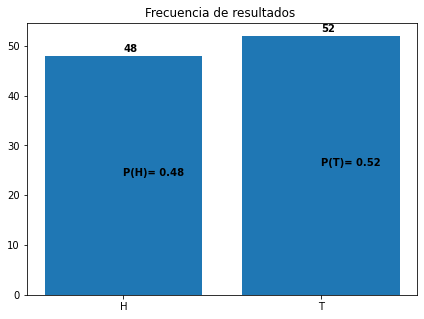

In [57]:
testII(100,True)

In [59]:
final = 100000
inicio = int(final*0.001)


In [60]:
guardar = {}
for i in range(inicio,final,inicio):
    guardar[i] = testI(i,False)
    

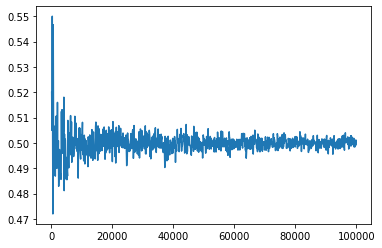

In [61]:
plt.plot(guardar.keys(), guardar.values())
plt.show()

<cita>En el fondo, la teoría de las probabilidades es solo el sentido común expresado con números (Simon Pierre Laplace) </cita> ”